In [83]:
import numpy as np
from numpy.fft import rfft,irfft, rfftfreq
import scipy
import scipy.interpolate as scint
import vlsr
import vlsr_iraf
from xkeckhelio import x_keckhelio
import fitsio
dir='/astro/u/anze/bmxdata/reduced/pas/191009_2100'
import matplotlib.pyplot as plt
import bmxhi4
from matplotlib.colors import LogNorm
from numpy.fft import rfft2,rfft
import scipy.linalg as la
dT=2**25/1.1e9*32

In [41]:
freq=fitsio.read(dir+'/cut1/freq.fits')
da2=fitsio.read(dir+'/cut1/auto_2.fits')
da3=fitsio.read(dir+'/cut1/auto_3.fits')

In [42]:
noise2=da2[:-1:2,:]-da2[1::2,:]
noise3=da3[:-1:2,:]-da3[1::2,:]

40.85224517184589
5.231961665690712
5.231689408748125
3.000041041057315
2.7948786658487914
2.7948009720599543
2.0000671487837494
2.0000273607048764


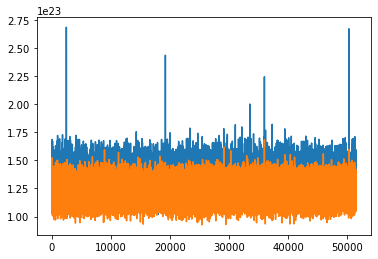

In [155]:
padded=np.vstack((noise2,np.zeros(noise2.shape)))
omega0=2*np.pi/(padded.shape[0]*dT)
noisep=rfft(padded,axis=0)
noisep=np.abs(noisep**2)
plt.plot(noisep[:,:].mean(axis=1))
for i in np.where(noisep[:,:].mean(axis=1)>2e23)[0]:
    print(2*np.pi/(i*omega0))
noisep=rfft(np.vstack((noise3,np.zeros(noise2.shape))),axis=0)
noisep=np.abs(noisep**2)
plt.plot(noisep[:,:].mean(axis=1))



In [84]:
cov2=np.cov(noise2,rowvar=False)
cov3=np.cov(noise3,rowvar=False)

In [94]:
d=np.sqrt(cov2.diagonal())
cor2=cov2/np.outer(d,d)

In [100]:
eva,eve=la.eig(cor2)

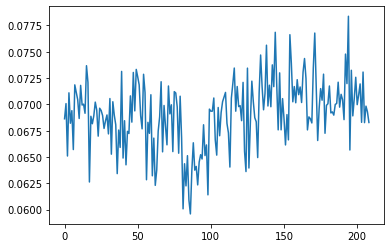

In [106]:
plt.plot(eve[:,0])

In [123]:
anoise=da2[:,:-1:2]-da2[:,1::2]

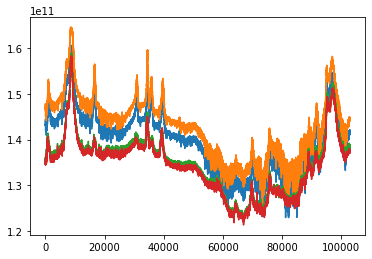

In [145]:
plt.plot(da2[:,:50].mean(axis=1))
plt.plot(da2[:,150:].mean(axis=1))
plt.plot(da3[:,:50].mean(axis=1))
plt.plot(da3[:,150:].mean(axis=1))
cc=da2[:,:50].mean(axis=1)+da2[:,150:].mean(axis=1)

1.5707595873561704 4.000093558400717
2.094346116474894 3.000070168800538
2.0943773641789476 3.0000254083355054
2.6179326455936174 2.4000561350404306
2.617963893297671 2.4000274882573285
3.1415191747123408 2.0000467792003587
3.1415504224163944 2.000026885561408


[]

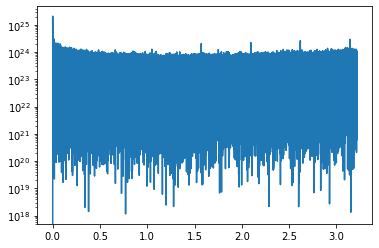

In [190]:
padded=np.hstack((np.zeros(cc.shape[0]),cc))
omega0=2*np.pi/(padded.shape[0]*dT)
noisep=rfft(padded)
noisep=np.abs(noisep**2)
x=omega0*np.arange(len(noisep))
plt.plot(x,noisep[:]*x**1.6)
for i in np.where(noisep[:]*x**1.6>2e24)[0]:
    if (x[i]>0.6):
        print(x[i],2*np.pi/(i*omega0))
plt.semilogy()


In [170]:
padded.shape

(205994,)

In [166]:
padded[-20:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [205]:
2*np.pi/(100539*omega0)

1.9999870994707254

In [211]:
cov=np.zeros((da.shape[1],da.shape[1]))
B=64
for i in range(len(da)//B):
    cov+=np.cov(da[B*i:B*(i+1)],rowvar=False)

In [218]:
eva,eve=la.eig(cov)

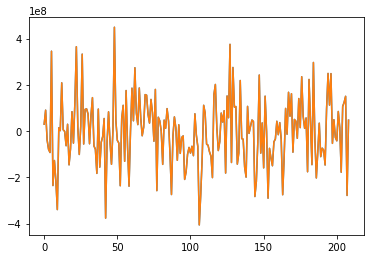

In [245]:
tv=da[:64,:].mean(axis=0)
#plt.plot(tv)
v1=np.zeros(da.shape[1])
v2=np.zeros(da.shape[1])
icov=la.inv(cov)
for i in range(64):
    v1+=np.dot(icov,da[i,:])*(-1)**i
    v2+=da[i,:]*(-1)**i
v1=np.dot(cov,v1)/64
v2/=64
plt.plot(v2)
plt.plot(v1)

In [1]:
ra

NameError: name 'ra' is not defined